# Visualization for Exploratory Data Analysis: Airline Analysis

## Scenario

I work for a travel agency and need to know the ins and outs of airline prices for your clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


## Data Exploration

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


## Univariate Analysis

### 1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

Average coach ticket price: 376.58525308213905
Median coach ticket price: 380.56
Price range: 549.22
Interquartile range (IQR): 95.23124999999999
Number of outliers: 620


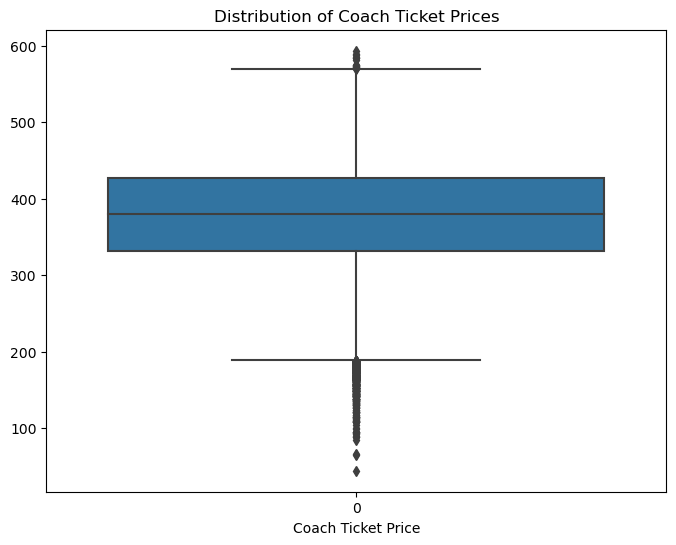

<Figure size 640x480 with 0 Axes>

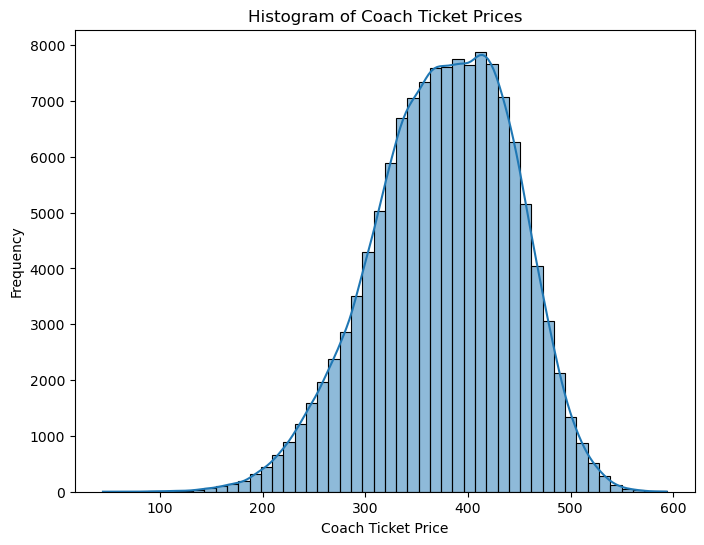

<Figure size 640x480 with 0 Axes>

In [211]:
# Calculate range of coach ticket prices
price_range = np.ptp(flight.coach_price)

# Calculate interquartile range (IQR)
Q1 = np.percentile(flight.coach_price, 25)
Q3 = np.percentile(flight.coach_price, 75)
IQR = Q3 - Q1

# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = flight[(flight.coach_price < lower_bound) | (flight.coach_price > upper_bound)]

# Print statistics
print("Average coach ticket price:", np.mean(flight.coach_price))
print("Median coach ticket price:", np.median(flight.coach_price))
print("Price range:", price_range)
print("Interquartile range (IQR):", IQR)
print("Number of outliers:", len(outliers))

# Create boxplot with titles and labels
plt.figure(figsize=(8, 6))
sns.boxplot(flight.coach_price)
plt.title('Distribution of Coach Ticket Prices')
plt.xlabel('Coach Ticket Price')
plt.show()
plt.clf()

# Create histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(flight.coach_price, bins=50, kde=True)
plt.title('Histogram of Coach Ticket Prices')
plt.xlabel('Coach Ticket Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()


#### Analysis:

The average coach ticket price is approximately `$376.59`, with a median price of `$380.56`. The distribution of coach ticket prices ranges from approximately `$0` to `$549.22`. The majority of coach ticket prices fall within an interquartile range (IQR) of `$95.23`, indicating that most prices are clustered around the median.

A `$500` ticket price may be considered relatively high and would depend on various factors such as the distance traveled, the time of booking, additional amenities offered, and personal preferences.

### 2. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Average coach ticket price for 8-hour-long flights: 431.834377372817
Median coach ticket price for 8-hour-long flights: 437.115
Price range for 8-hour-long flights: 422.865


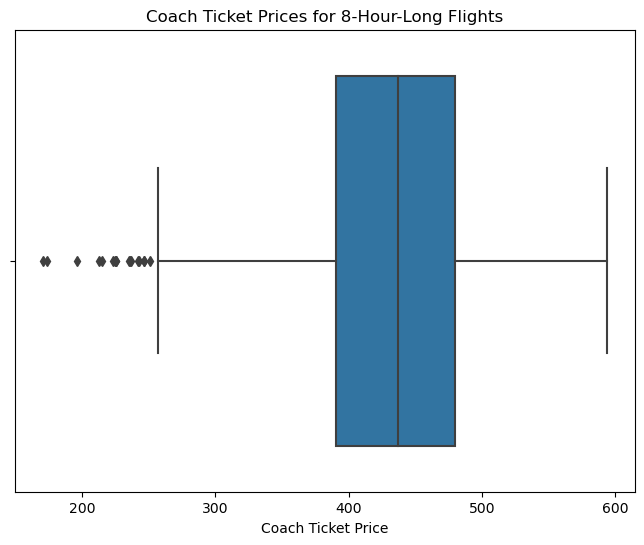

<Figure size 640x480 with 0 Axes>

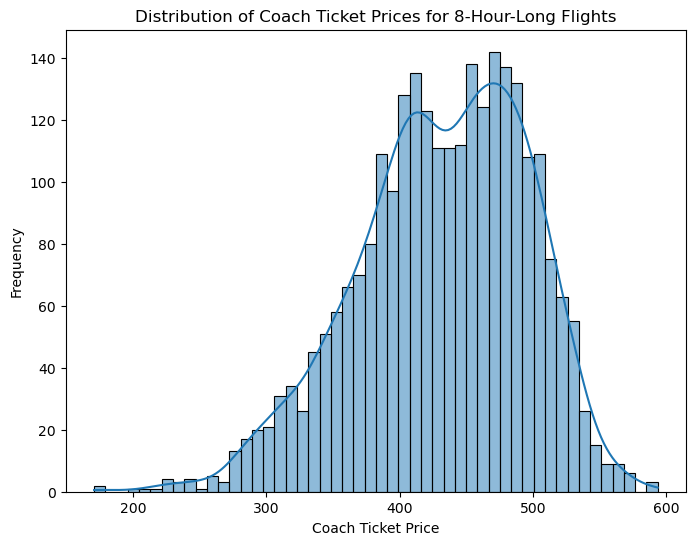

Is a $500 ticket more reasonable for 8-hour-long flights?
Yes, a $500 ticket is within the range of prices for 8-hour-long flights.


<Figure size 640x480 with 0 Axes>

In [213]:
# Calculate statistics for 8-hour-long flights
coach_prices_8_hours = flight.coach_price[flight.hours == 8]
average_price_8_hours = np.mean(coach_prices_8_hours)
median_price_8_hours = np.median(coach_prices_8_hours)
price_range_8_hours = np.ptp(coach_prices_8_hours)

# Print statistics
print("Average coach ticket price for 8-hour-long flights:", average_price_8_hours)
print("Median coach ticket price for 8-hour-long flights:", median_price_8_hours)
print("Price range for 8-hour-long flights:", price_range_8_hours)

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=coach_prices_8_hours, data=flight)
plt.title('Coach Ticket Prices for 8-Hour-Long Flights')
plt.xlabel('Coach Ticket Price')
plt.show()
plt.clf()

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(coach_prices_8_hours, bins=50, kde=True)
plt.title('Distribution of Coach Ticket Prices for 8-Hour-Long Flights')
plt.xlabel('Coach Ticket Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()

# Assess the reasonableness of a $500 ticket
print("Is a $500 ticket more reasonable for 8-hour-long flights?")
if 500 <= np.max(coach_prices_8_hours):
    print("Yes, a $500 ticket is within the range of prices for 8-hour-long flights.")
else:
    print("No, a $500 ticket is higher than the maximum observed price for 8-hour-long flights.")


#### Analysis

The average coach ticket price for 8-hour-long flights is approximately `$431.83`, with a median price of `$437.12`.
Considering that the maximum observed price for 8-hour-long flights falls within the range of `$431.83` to `$854.70`, a `$500` ticket is indeed within the observed range, however, the price is deemed reasonable depends on various factors such as the specific amenities offered on the flight, the time of booking, and individual preferences.

### 3. How are flight delay times distributed? How often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

Flight Delay Time Statistics:
count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


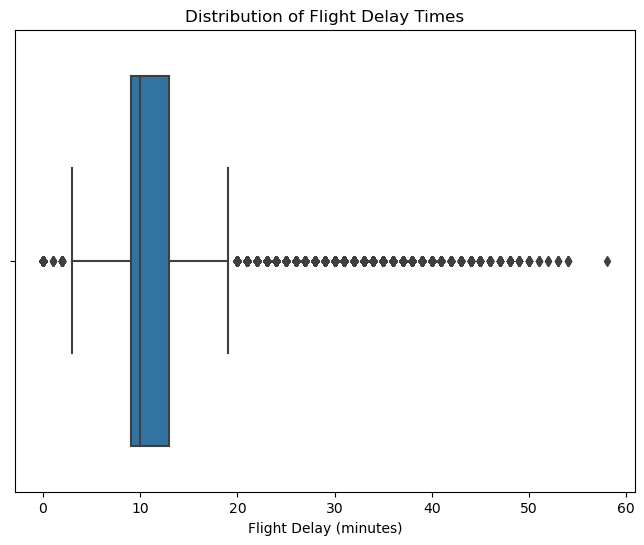

<Figure size 640x480 with 0 Axes>

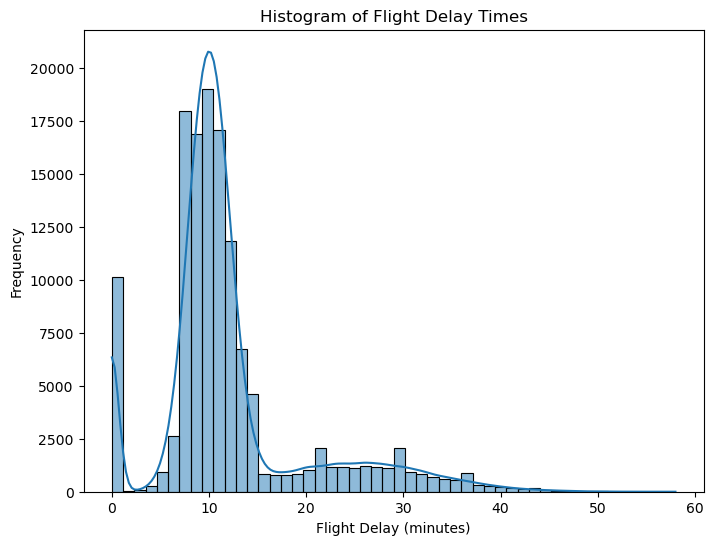

<Figure size 640x480 with 0 Axes>

In [214]:
# Describe flight delay times
print("Flight Delay Time Statistics:")
print(flight.delay.describe())

# Create boxplot of flight delay times
plt.figure(figsize=(8, 6))
sns.boxplot(x=flight.delay[flight.delay <= 500], data=flight)
plt.title('Distribution of Flight Delay Times')
plt.xlabel('Flight Delay (minutes)')
plt.show()
plt.clf()

# Create histogram of flight delay times
plt.figure(figsize=(8, 6))
sns.histplot(flight.delay[flight.delay <= 500], bins=50, kde=True)
plt.title('Histogram of Flight Delay Times')
plt.xlabel('Flight Delay (minutes)')
plt.ylabel('Frequency')
plt.show()
plt.clf()

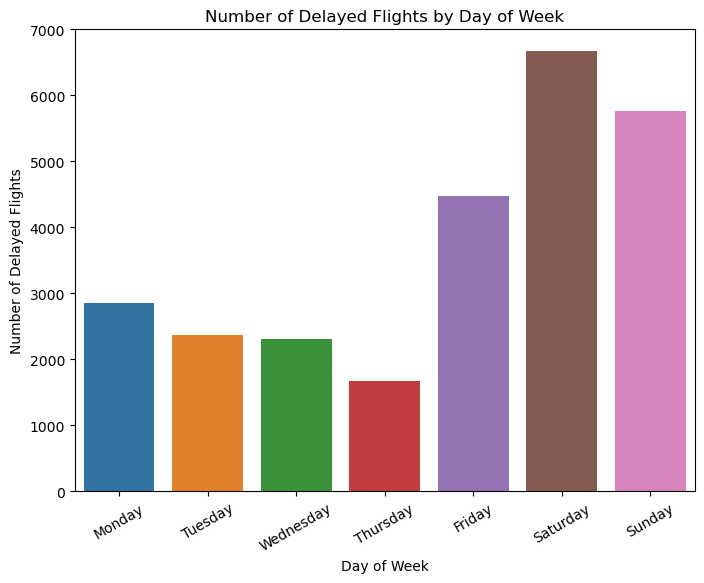

<Figure size 640x480 with 0 Axes>

In [216]:
# Filter flights with delay more than the average flight delay
delayed_flights = flight[flight.delay > np.mean(flight.delay)]

# Define the order of days of the week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate value counts of delayed flights by day_of_week
delayed_counts = delayed_flights['day_of_week'].value_counts().reindex(week_order)

# Plot a countplot with specified order and rotated x-axis labels
plt.figure(figsize=(8, 6))
sns.countplot(x=delayed_flights['day_of_week'], order=week_order)
plt.xticks(rotation=30)

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Day of Week')

# Show the plot
plt.show()
plt.clf()

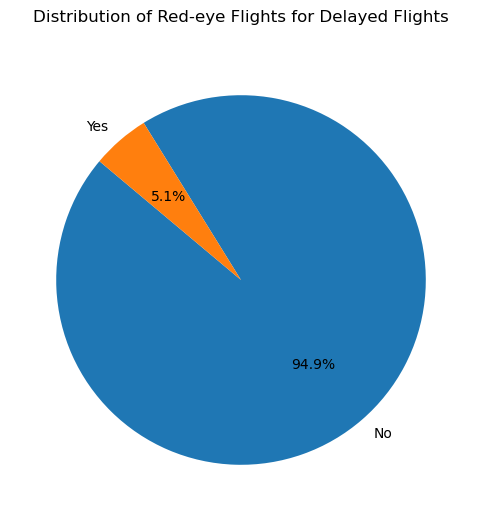

<Figure size 640x480 with 0 Axes>

In [217]:
# Filter flights with delays greater than the mean delay
delayed_flights = flight[flight.delay > np.mean(flight.delay)]

# Count the occurrences of 'redeye' categories for delayed flights
redeye_counts = delayed_flights['redeye'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(redeye_counts, labels=redeye_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Red-eye Flights for Delayed Flights', pad=20)
plt.show()
plt.clf()

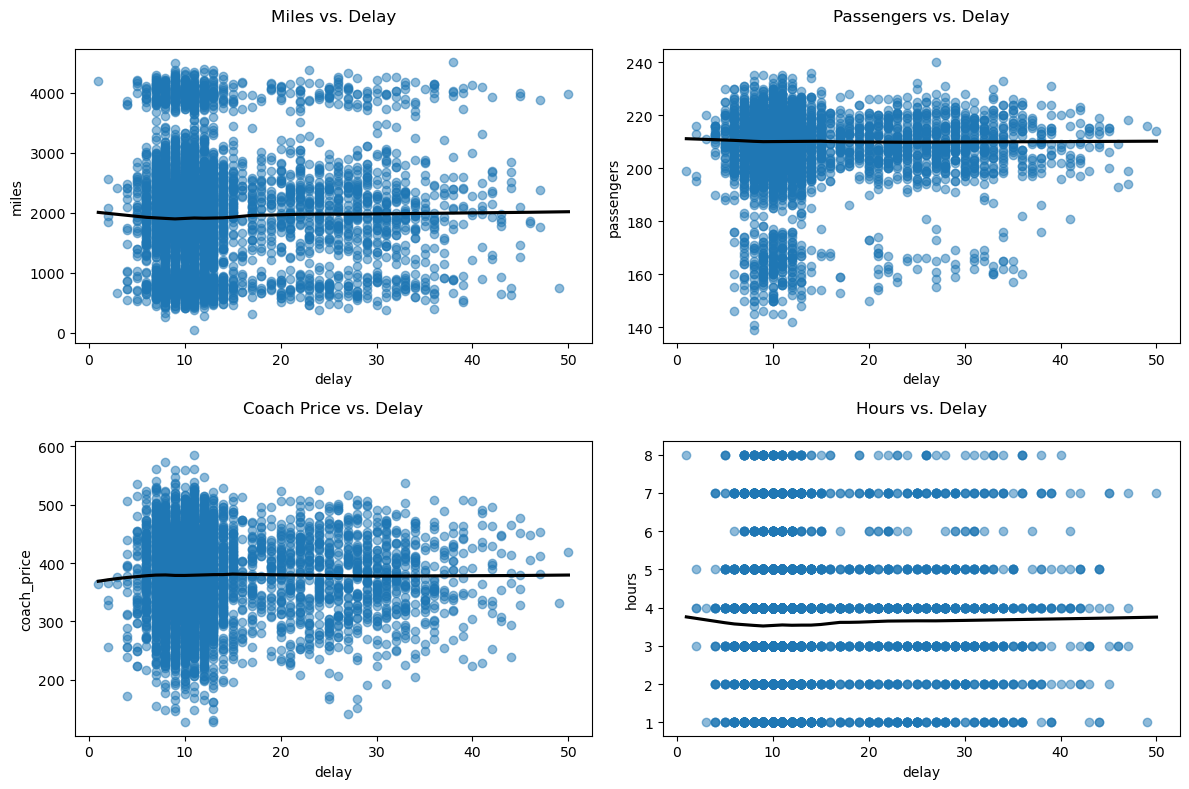

<Figure size 640x480 with 0 Axes>

In [240]:
# Define sampling percentage
perc = 0.05

# Filter flights with delay between 1 and 60 minutes and sample
flight_sub = flight[flight.delay.between(1, 60)].sample(n=int(flight[flight.delay.between(1, 60)].shape[0] * perc))

# Create subplots
plt.figure(figsize=(12, 8))

# Plot for 'miles' vs. 'delay'
plt.subplot(2, 2, 1)
sns.regplot(x='delay', y='miles', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Miles vs. Delay', loc='center', pad=20) 

# Plot for 'passengers' vs. 'delay'
plt.subplot(2, 2, 2)
sns.regplot(x='delay', y='passengers', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Passengers vs. Delay', loc='center', pad=20) 

# Plot for 'coach_price' vs. 'delay'
plt.subplot(2, 2, 3)
sns.regplot(x='delay', y='coach_price', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Coach Price vs. Delay', loc='center', pad=20) 

# Plot for 'hours' vs. 'delay'
plt.subplot(2, 2, 4)
sns.regplot(x='delay', y='hours', data=flight_sub, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, lowess=True)
plt.title('Hours vs. Delay', loc='center', pad=20)  

plt.tight_layout()

# Show the plots
plt.show()
plt.clf()


#### Analysis

- Flight delay times exhibit a right-skewed distribution, as indicated by the mean delay of approximately 13.16 minutes and the maximum observed delay of 1560 minutes (approximately 26 hours). The median delay, however, is relatively low at 10 minutes, suggesting that a significant proportion of delays are short in duration.
- The majority of delays are relatively short, there are instances of large delays. Typical delays fall within a relatively narrow range, with 75% of delays being less than or equal to 13 minutes.
- Delays most commonly occur on weekends, particularly on Saturdays, while Thursdays typically experience the fewest delays exceeding the average duration.
- Nearly 95% of delays exceeding the average duration typically occur during daylight hours.
- No correlation was found between factors such as flight distance, number of passengers, coach price, flight duration, and delays within 60 minutes.


## Bivariate Analysis

### 4. What is the relationship between coach and first-class prices? Do flights with higher coach prices always have higher first-class prices as well?

/Users/elizavetachvorda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

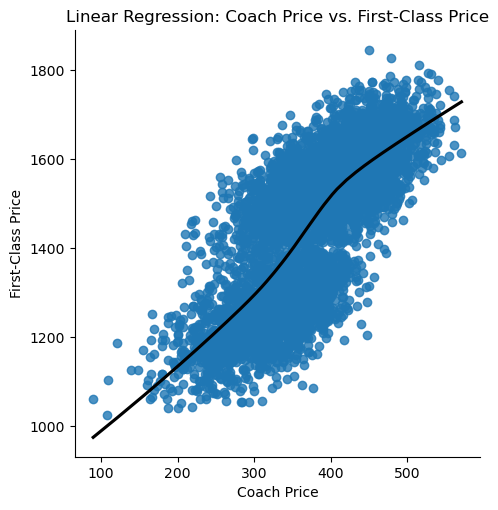

<Figure size 640x480 with 0 Axes>

In [247]:
# Define sampling percentage
perc = 0.05

# Sample a subset of flights for analysis
flight_sub = flight.sample(n=int(flight.shape[0] * perc))

# Create subplots with increased spacing
plt.figure(figsize=(6, 6))

# Linear regression plot to explore the trend between coach and first-class prices
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.title('Linear Regression: Coach Price vs. First-Class Price')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')

# Show the plot
plt.show()
plt.clf()

#### Analysis

As shown in the scatterplot above, there appears to be a linear positive relationship between coach and first-class prices. This suggests that, in general, flights with higher coach prices tend to have higher first-class prices as well.

### 5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

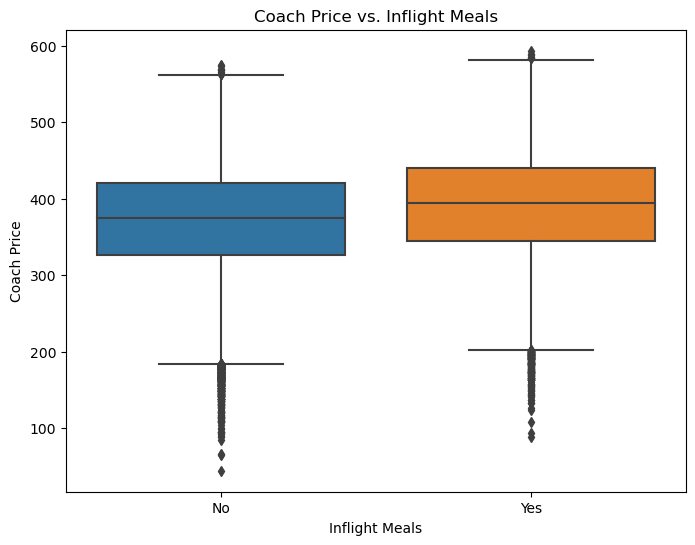

<Figure size 640x480 with 0 Axes>

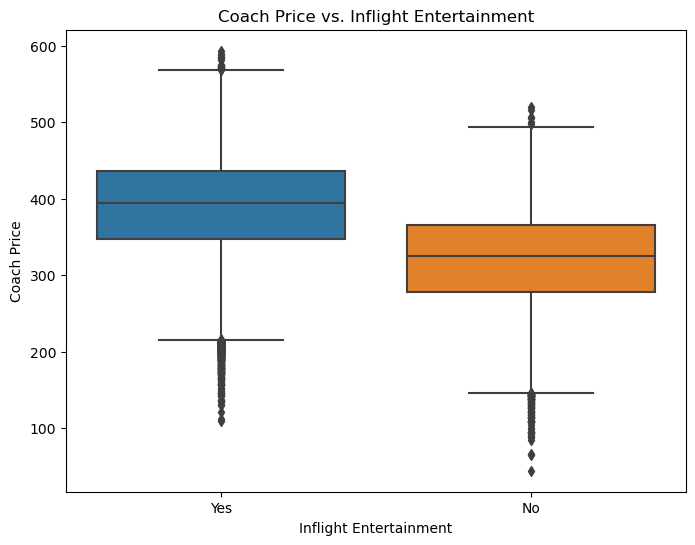

<Figure size 640x480 with 0 Axes>

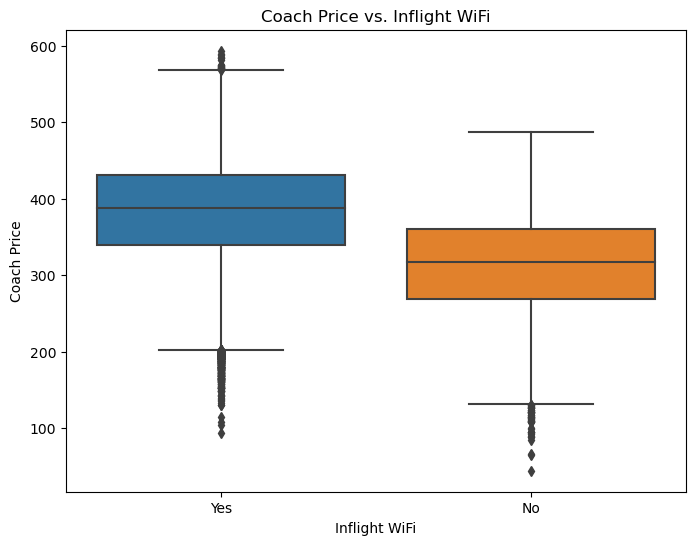

<Figure size 640x480 with 0 Axes>

In [226]:
# Inflight Meals
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_meal', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight Meals')
plt.xlabel('Inflight Meals')
plt.ylabel('Coach Price')
plt.show()
plt.clf()

# Inflight Entertainment
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight Entertainment')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Coach Price')
plt.show()
plt.clf()

# Inflight WiFi
plt.figure(figsize=(8, 6))
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight)
plt.title('Coach Price vs. Inflight WiFi')
plt.xlabel('Inflight WiFi')
plt.ylabel('Coach Price')
plt.show()
plt.clf()

#### Analysis

- The prices for flights with inflight meals and without overlap, indicating minimal variation. Flights with meals have slightly higher prices, although the difference is insignificant.
- Inflight entertainment and WiFi are associated with an increase in the average cost of a coach ticket by approximately $60-70. This suggests that the presence of these features is valued by passengers and may justify a higher ticket price.


### 6. How does the number of passengers change in relation to the length of flights?

/Users/elizavetachvorda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

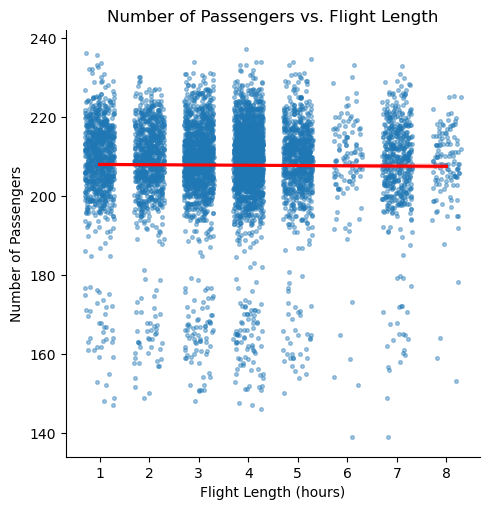

<Figure size 640x480 with 0 Axes>

In [235]:
# Visualize the relationship between number of passengers and flight length
plt.figure(figsize=(10, 6))
sns.lmplot(x='hours', y='passengers', data = flight_sub, scatter_kws={"s": 7, "alpha":0.4}, x_jitter = .30, y_jitter = .30, fit_reg = False)
sns.regplot(x='hours', y='passengers', data=flight_sub, scatter=False, color='red')
plt.title('Number of Passengers vs. Flight Length')
plt.xlabel('Flight Length (hours)')
plt.ylabel('Number of Passengers')
plt.show()
plt.clf()

#### Analysis 

- As the linear regression line indicates, there is no discernible overall trend between flight length and the number of passengers.
- Although the chart shows that the typical flight duration varies between 1 and 4 hours, with 4 hours being the most common.
- Despite the lack of correlation between flight length and the number of passengers, the most common range for the number of passengers is approximately between 200 and 220.

## Multivariate Analysis

### 7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

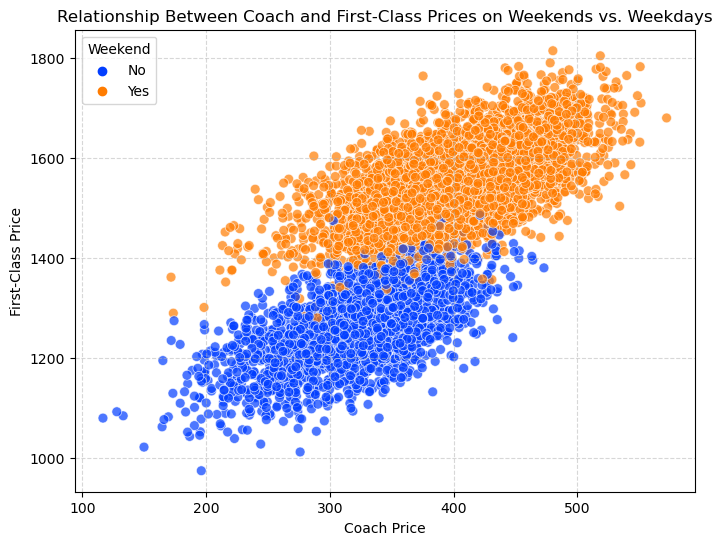

<Figure size 640x480 with 0 Axes>

In [237]:
# Visualize the relationship between coach and first-class prices on weekends compared to weekdays
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight_sub, palette='bright', alpha=0.7, s=50)
plt.title('Relationship Between Coach and First-Class Prices on Weekends vs. Weekdays')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.legend(title='Weekend', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()
plt.clf()

#### Analysis

- In both groups, there is a positive correlation between coach and first-class prices, indicating that as coach prices increase, first-class prices tend to increase as well.
- The prices for both types of flights significantly differ depending on whether the flight occurs on a weekend or weekday. The distinct separation of dots suggests that prices on weekends are generally higher than on weekdays.

### 8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

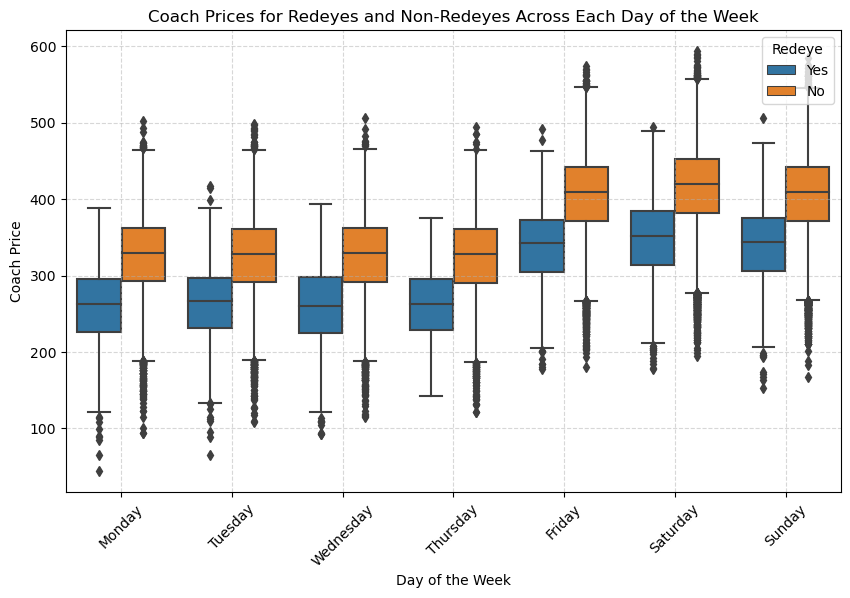

<Figure size 640x480 with 0 Axes>

In [243]:
# Visualize the difference in coach prices between redeyes and non-redeyes on each day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight, order=week_order)
plt.title('Coach Prices for Redeyes and Non-Redeyes Across Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')
plt.legend(title='Redeye', loc='upper right')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()
plt.clf()

#### Analysis

- The boxplot indicates that overnight flights tend to have significantly lower prices regardless of the day of the week.
- Prices for both groups (with and without redeye) tend to be higher on Friday, Saturday, and Sunday.